In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

import env
import wrangle

# Exercises: Explore Telco

Our Telco scenario continues:

As a customer analyst for Telco, you want to know who has spent the most money with the company over their lifetime. You have monthly charges and tenure, so you think you will be able to use those two attributes as features to estimate total charges. You need to do this within an average of $5.00 per customer.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

Do your work in a notebook named explore.ipynb. In addition, you should create a file named explore.py that contains the following functions for exploring your variables (features & target).

1. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.
2. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.
3. Write a function named months_to_years that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer.
4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.
5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.
6. Explore your dataset with any other visualizations you think will be helpful.
7. In a seperate notebook, use the functions you have developed in this exercise with the mall_customers dataset in the Codeup database server. You will need to write a sql query to acquire your data. Make spending_score your target variable.


________________________

In [2]:
df = wrangle.wrangle_telco()

In [ ]:
df.head()

In [ ]:
df.info()

### Hypothesis:

- $H_0$: there is no correlation between the monthly_charges and total_charges
- $H_a$: there is a correlation between the monthly_charges and total_charges

_____________________________

### 1. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [3]:
#split from wrange function
train, validate, test = wrangle.split_data(df)

train -> (949, 4)
validate -> (407, 4)
test -> (339, 4)


In [4]:
telco_corr = train.drop(columns=['customer_id']).corr()
telco_corr

,monthly_charges,tenure,total_charges
monthly_charges,1.000000,0.424806,0.941523
tenure,0.424806,1.000000,0.650009
total_charges,0.941523,0.650009,1.000000


In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(telco_corr, cmap='Purples', annot=True, linewidth=0.5, mask= np.triu(telco_corr))
plt.ylim(0, 4)

plt.show()

In [ ]:
# Use a scipy stats function pearsonr to calculate the correlation coefficient and the p-value.

r, p_value = pearsonr(train.monthly_charges, train.total_charges)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')

### Heatmap Takeways:

- There appears to be a high correlation between total_charges and mothly_charges
- Based on my correlation coefficient and my p-value, I reject my Null hypothesis that there is no correlation between monthly_charges and total_charges.

__________________________________

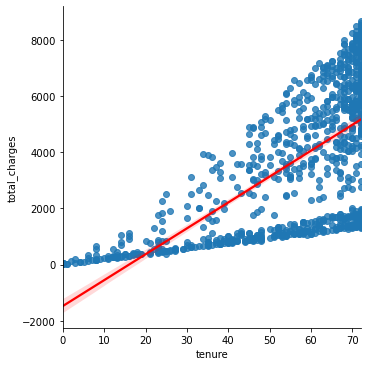

In [7]:
#add regression line to scatter plot
sns.lmplot(y="total_charges", x="tenure", data=train, line_kws={'color': 'red'})
plt.show()

<hr style="border:2px solid black"> </hr>

### 2. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

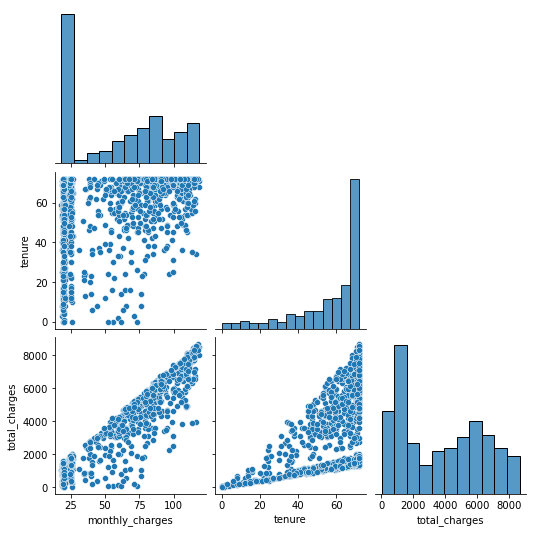

In [8]:
#regular pairplot
sns.pairplot(train[['monthly_charges', 'tenure', 'total_charges']], corner=True)
plt.show()

__________________________________

In [23]:
#turn into function with gridline
def plot_variable_pairs(df):
    columns = df[list(df.select_dtypes(exclude = 'O').columns)]
    sns.set(style='whitegrid', palette='muted')
    g = sns.PairGrid(columns)
    g = g.map(sns.regplot, line_kws={'color':'red'})

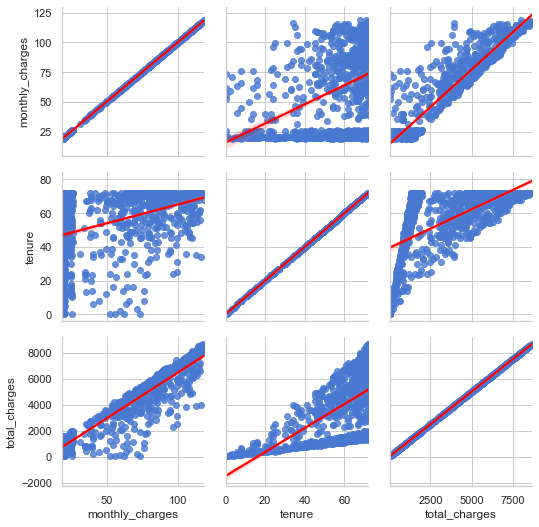

In [24]:
plot_variable_pairs(train)

<hr style="border:2px solid black"> </hr>

### 3. Write a function named months_to_years that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer.

In [10]:
def months_to_years(df):
    '''
    this function accepts the telco churn dataframe
    and returns a dataframe with a new feature in complete years of tenure
    '''
    df['tenure_years'] = (df.tenure/12).astype(int)
    return df

In [11]:
months_to_years(df).head()

,customer_id,monthly_charges,tenure,total_charges,tenure_years
0,0013-SMEOE,109.70,71,7904.25,5
1,0014-BMAQU,84.65,63,5377.80,5
2,0016-QLJIS,90.45,65,5957.90,5
3,0017-DINOC,45.20,54,2460.55,4
4,0017-IUDMW,116.80,72,8456.75,6


<hr style="border:2px solid black"> </hr>

### 4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [27]:
import wrangle

In [28]:
all_telco_data(train)

NameError: name 'all_telco_data' is not defined

__________________________________

<hr style="border:2px solid black"> </hr>

### 5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

In [12]:
import explore

In [13]:
months_to_years(df).head()

,customer_id,monthly_charges,tenure,total_charges,tenure_years
0,0013-SMEOE,109.70,71,7904.25,5
1,0014-BMAQU,84.65,63,5377.80,5
2,0016-QLJIS,90.45,65,5957.90,5
3,0017-DINOC,45.20,54,2460.55,4
4,0017-IUDMW,116.80,72,8456.75,6


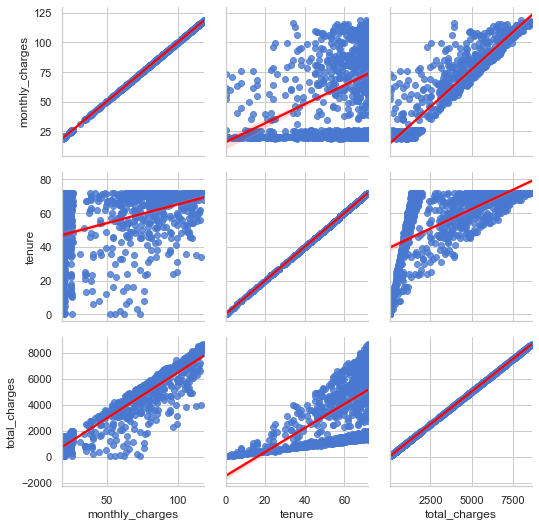

In [25]:
plot_variable_pairs(train)

In [ ]:
 plot_categorical_and_continuous_vars

<hr style="border:2px solid black"> </hr>

### 6. Explore your dataset with any other visualizations you think will be helpful.

<hr style="border:2px solid black"> </hr>

### 7. In a seperate notebook, use the functions you have developed in this exercise with the mall_customers dataset in the Codeup database server. You will need to write a sql query to acquire your data. Make spending_score your target variable.